# Important Library


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from sklearn import impute
warnings.filterwarnings("ignore")

# Loading dataset

In [153]:
df = pd.read_json("data/output.json")
df = df.drop(['start_date'], axis = 1)
df = df.drop_duplicates()
df.shape

(2598, 18)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 0 to 2946
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     2598 non-null   object 
 1   description               2585 non-null   object 
 2   address                   2598 non-null   object 
 3   area                      2598 non-null   object 
 4   end_date                  0 non-null      float64
 5   floor_number              2598 non-null   object 
 6   bedroom_number            2598 non-null   object 
 7   is_dinning_room           2598 non-null   bool   
 8   is_kitchen                2598 non-null   bool   
 9   is_terrace                2598 non-null   bool   
 10  is_car_pack               2598 non-null   bool   
 11  is_owner                  2598 non-null   bool   
 12  type                      2598 non-null   object 
 13  direction                 2598 non-null   object 
 14  street_in_fro

In [155]:
df = df.drop(['end_date','description'], axis = 1)
df

,price,address,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,law
0,"10,3 tỷ","Đường Lạc Long Quân, Phường Thụy Khuê, Quận T...",48 m,4,4,False,False,False,False,False,Nhà trong hẻm,_,3m,---,---,Sổ hồng/ Sổ đỏ
1,"8,8 tỷ","Đường Vĩnh Tuy, Phường Vĩnh Tuy, Quận Hai Bà...",53 m,5,3,True,True,True,False,False,Nhà trong hẻm,Đông Nam,3m,6m,9m,Sổ hồng/ Sổ đỏ
2,"2,1 tỷ","Xã Bình Yên, Huyện Thạch Thất, Hà Nội",66 m,---,---,False,False,False,False,False,"Đất thổ cư, đất ở",_,5m,5m,14m,Sổ hồng/ Sổ đỏ
3,160 triệu,"Đường Hà Trì 1, Phường Hà Cầu, Quận Hà Đông, ...",45 m,3,4,True,True,False,False,False,Nhà trong hẻm,Nam,3m,8m,6m,---
4,"2,25 tỷ / m","Tỉnh lộ 420, Xã Bình Yên, Huyện Thạch Thất, H...",79 m,---,---,False,False,False,False,False,"Đất thổ cư, đất ở",Đông,6m,5m,15m,---
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,"28,8 tỷ","Phố Kim Đồng, Phường Giáp Bát, Quận Hoàng Mai...",65 m,5,4,True,True,True,True,False,Nhà trong hẻm,_,7m,5m,13m,Sổ hồng/ Sổ đỏ
2943,"3,5 tỷ","Đường Phúc Thành, Phường Biên Giang, Quận Hà ...",60 m,---,---,False,False,False,False,False,"Đất thổ cư, đất ở",_,8m,"3,5m",---,Sổ hồng/ Sổ đỏ
2944,"5,65 tỷ","Đường Quyết Thắng, Phường Yên Nghĩa, Quận Hà ...",40 m,---,---,False,False,False,False,False,"Đất thổ cư, đất ở",_,4m,"3,85m",---,Sổ hồng/ Sổ đỏ
2945,"3,15 tỷ","Đường Yên Bình, Phường Yên Nghĩa, Quận Hà Đôn...",35 m,---,---,False,False,False,False,False,"Đất thổ cư, đất ở",_,4m,"3,6m",---,Sổ hồng/ Sổ đỏ


# Preprocessing

In [156]:
def convert_area(area):
    for i in range(len(area)):
        try:
            if re.search("m$", area[i]):
                area[i] = re.sub("m", "", area[i])
                area[i] = re.sub(",", ".", area[i])
                area[i] = float(area[i])
            else:
                area[i] = np.nan
        except:
            area[i] = np.nan
    return area

def convert_direction(direction):
    for i in range(len(direction)):
        if (direction[i] == '_'):
            direction[i] = np.nan
        else:
            continue
    return direction

def convert_law(law):
    for i in range(len(law)):
        if law[i] == "---":
            law[i] = np.nan
        else:
            continue
    return law
        
def convert_price(price):
    for i in range(len(price)):
        try:
            if re.search("tỷ $", price[i]):
                price[i] = price[i].split(' ')[1]
                price[i] = re.sub(",", ".", price[i])
                price[i] = float(price[i])
            else:
                price[i] = np.nan
        except:
            price[i] = np.nan
    return price

def convert_address(address):
    city = []
    district = []
    for i in range(len(address)):
        address[i] = re.split(', ', address[i])
        try:
            if re.search('Quận ', address[i][-2]):
                address[i][-2] = re.sub('Quận ', '', address[i][-2])
            else:
                address[i][-2] = re.sub('Huyện ', '', address[i][-2])
        except:
            address[i][-2] = np.nan
        district.append(address[i][-2])
        city.append(address[i][-1])
        
    return city, district

In [157]:
price = df['price'].tolist()
area = df['area'].tolist()
width = df['width'].tolist()
height = df['height'].tolist()
street_infront_house = df['street_in_front_of_house'].tolist()
direction = df['direction'].tolist()
law = df['law'].tolist()
address = df['address'].tolist()

area = convert_area(area)
width = convert_area(width)
height = convert_area(height)
street_infront_house = convert_area(street_infront_house)
direction = convert_direction(direction)
price = convert_price(price)
law = convert_law(law)
city, district = convert_address(address)

df['price'] = price
df['area'] = area
df['width'] = width
df['height'] = height
df['street_in_front_of_house'] = street_infront_house
df['direction'] = direction
df['law'] = law
df['city'] = city
df['district'] = district

bedroom_no = df['bedroom_number'].tolist()
floor_no = df['floor_number'].tolist()
for i in range(len(bedroom_no)):
    try:
        bedroom_no[i] = float(bedroom_no[i])
    except:
        bedroom_no[i] = np.nan

for i in range(len(floor_no)):
    try:
        floor_no[i] = float(floor_no[i])
    except:
        floor_no[i] = np.nan
df['bedroom_number'] = bedroom_no
df['floor_number'] = floor_no
df.head()

,price,address,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,law,city,district
0,10.3,"Đường Lạc Long Quân, Phường Thụy Khuê, Quận T...",48.0,4.0,4.0,False,False,False,False,False,Nhà trong hẻm,NaN,3.0,NaN,NaN,Sổ hồng/ Sổ đỏ,Hà Nội,Tây Hồ
1,8.8,"Đường Vĩnh Tuy, Phường Vĩnh Tuy, Quận Hai Bà...",53.0,5.0,3.0,True,True,True,False,False,Nhà trong hẻm,Đông Nam,3.0,6.0,9.0,Sổ hồng/ Sổ đỏ,Hà Nội,Hai Bà Trưng
2,2.1,"Xã Bình Yên, Huyện Thạch Thất, Hà Nội",66.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",NaN,5.0,5.0,14.0,Sổ hồng/ Sổ đỏ,Hà Nội,Thạch Thất
3,NaN,"Đường Hà Trì 1, Phường Hà Cầu, Quận Hà Đông, ...",45.0,3.0,4.0,True,True,False,False,False,Nhà trong hẻm,Nam,3.0,8.0,6.0,NaN,Hà Nội,Hà Đông
4,NaN,"Tỉnh lộ 420, Xã Bình Yên, Huyện Thạch Thất, H...",79.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",Đông,6.0,5.0,15.0,NaN,Hà Nội,Thạch Thất


In [158]:
df = df.drop(['address','city','law'], axis =  1)

In [159]:
df.iloc[0:10]

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,is_owner,type,direction,street_in_front_of_house,width,height,district
0,10.30,48.0,4.0,4.0,False,False,False,False,False,Nhà trong hẻm,NaN,3.0,NaN,NaN,Tây Hồ
1,8.80,53.0,5.0,3.0,True,True,True,False,False,Nhà trong hẻm,Đông Nam,3.0,6.00,9.0,Hai Bà Trưng
2,2.10,66.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",NaN,5.0,5.00,14.0,Thạch Thất
3,NaN,45.0,3.0,4.0,True,True,False,False,False,Nhà trong hẻm,Nam,3.0,8.00,6.0,Hà Đông
4,NaN,79.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",Đông,6.0,5.00,15.0,Thạch Thất
5,9.60,45.0,5.0,3.0,False,False,False,False,False,Nhà trong hẻm,NaN,3.0,4.50,NaN,Thanh Xuân
6,3.50,173.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",NaN,7.0,5.00,34.0,Thạch Thất
7,10.80,40.0,7.0,10.0,True,True,True,True,False,Nhà trong hẻm,Tây,3.0,5.00,8.0,Ba Đình
8,NaN,162.0,NaN,NaN,False,False,False,False,False,"Đất nền, liền kề, đất dự án",NaN,4.0,8.18,NaN,Thạch Thất
9,2.25,79.0,NaN,NaN,False,False,False,False,False,"Đất thổ cư, đất ở",NaN,5.0,5.00,16.0,Thạch Thất


# Check number of missing values

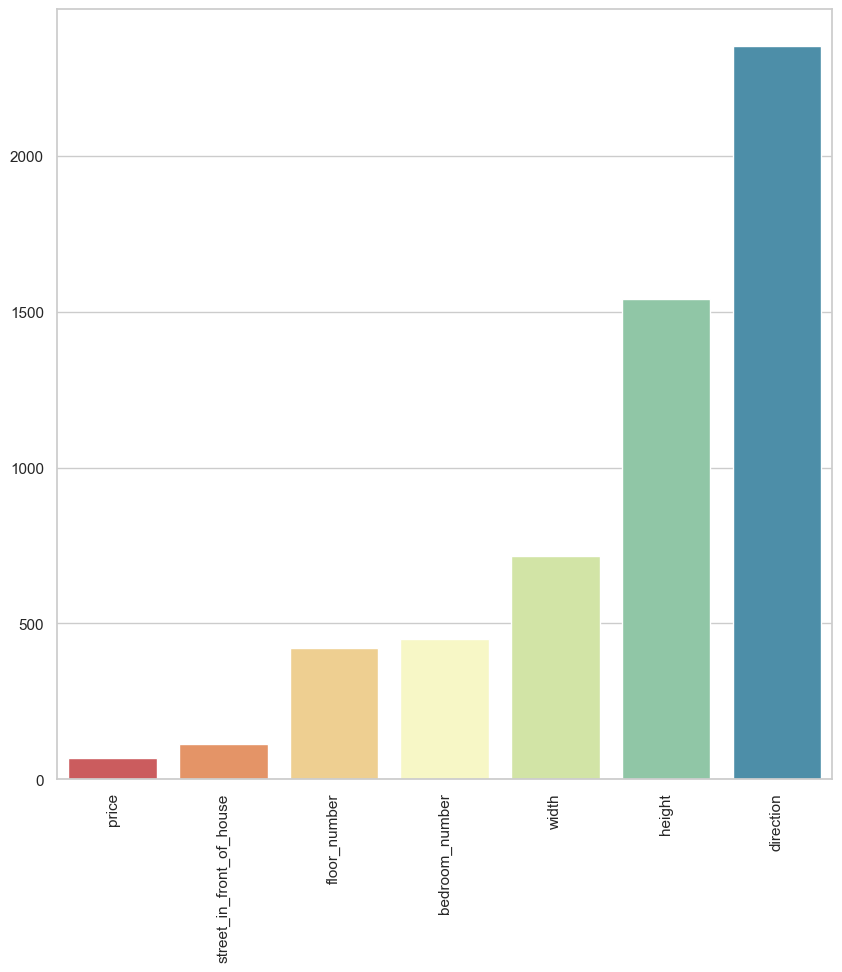

In [160]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
fig = plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid')
ax = sns.barplot(x = missing.index.tolist(), y = missing, palette = 'Spectral')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

In [161]:
# drop direction column
# df = df.drop(['direction'], axis=1)
df = df[df.price.notna()]

In [162]:
df = df.drop('is_owner', axis = 1)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,direction,street_in_front_of_house,width,height,district
0,10.30,48.0,4.0,4.0,False,False,False,False,Nhà trong hẻm,NaN,3.0,NaN,NaN,Tây Hồ
1,8.80,53.0,5.0,3.0,True,True,True,False,Nhà trong hẻm,Đông Nam,3.0,6.00,9.0,Hai Bà Trưng
2,2.10,66.0,NaN,NaN,False,False,False,False,"Đất thổ cư, đất ở",NaN,5.0,5.00,14.0,Thạch Thất
5,9.60,45.0,5.0,3.0,False,False,False,False,Nhà trong hẻm,NaN,3.0,4.50,NaN,Thanh Xuân
6,3.50,173.0,NaN,NaN,False,False,False,False,"Đất thổ cư, đất ở",NaN,7.0,5.00,34.0,Thạch Thất
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,28.80,65.0,5.0,4.0,True,True,True,True,Nhà trong hẻm,NaN,7.0,5.00,13.0,Hoàng Mai
2943,3.50,60.0,NaN,NaN,False,False,False,False,"Đất thổ cư, đất ở",NaN,8.0,3.50,NaN,Hà Đông
2944,5.65,40.0,NaN,NaN,False,False,False,False,"Đất thổ cư, đất ở",NaN,4.0,3.85,NaN,Hà Đông
2945,3.15,35.0,NaN,NaN,False,False,False,False,"Đất thổ cư, đất ở",NaN,4.0,3.60,NaN,Hà Đông


# Numerical and Categorical feature

In [163]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_numerical.columns

Index(['price', 'area', 'floor_number', 'bedroom_number',
       'street_in_front_of_house', 'width', 'height'],
      dtype='object')

In [164]:
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()
features_categorical.columns

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack', 'type',
       'direction', 'district'],
      dtype='object')

# Visualization

## Line plot

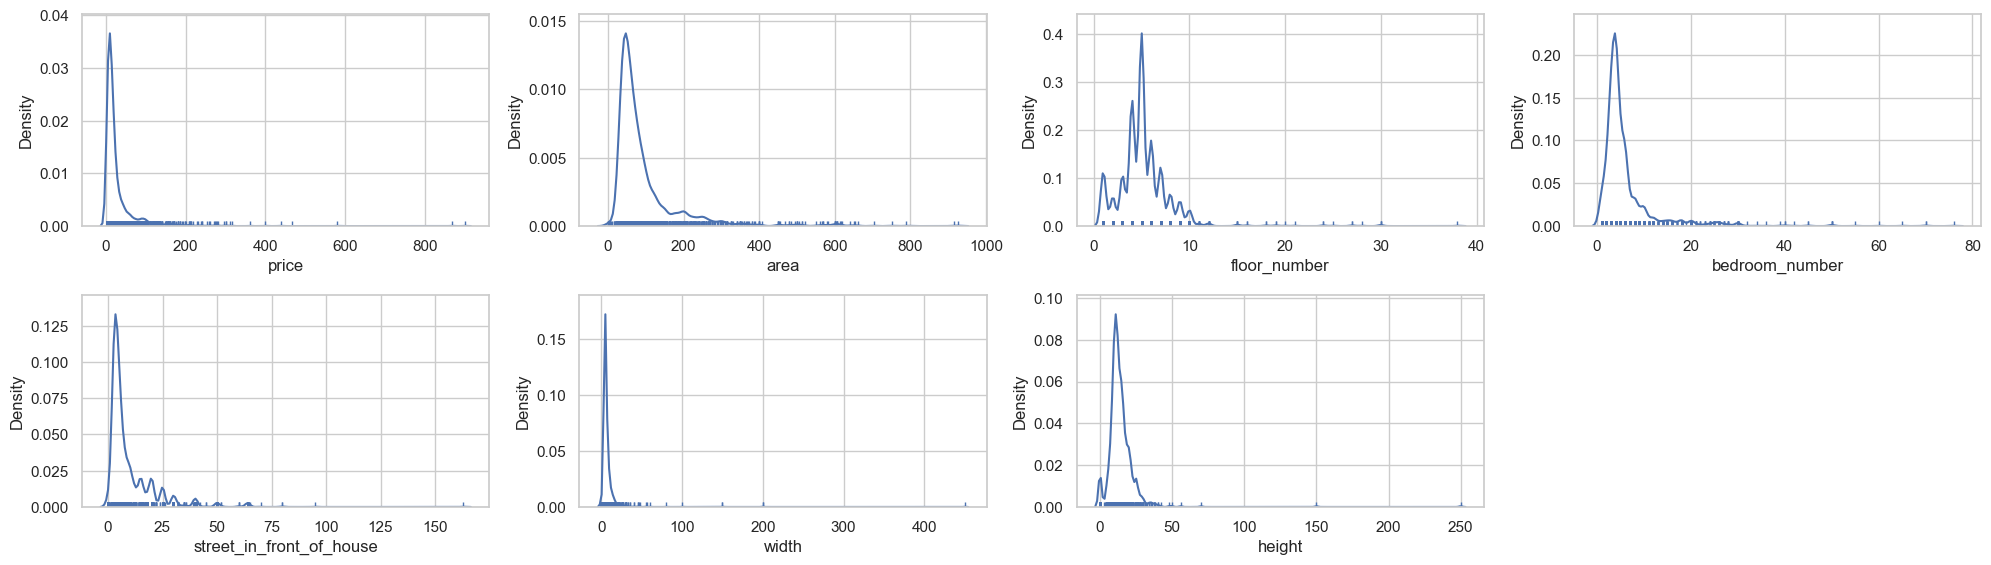

In [165]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

In [166]:
# Phân bố dữ liệu quá lệch, do đó loại một số outlier
df.drop(df[df.price > 100].index, inplace = True)
df.drop(df[df.area > 400].index, inplace = True)
df.drop(df[df.floor_number > 12].index, inplace = True)
df.drop(df[df.bedroom_number > 20].index, inplace = True)
df.drop(df[df.street_in_front_of_house > 60].index, inplace = True)
df.drop(df[df.width > 60].index, inplace = True)
df.drop(df[df.height > 50].index, inplace = True)

features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()

df.shape

(2274, 14)

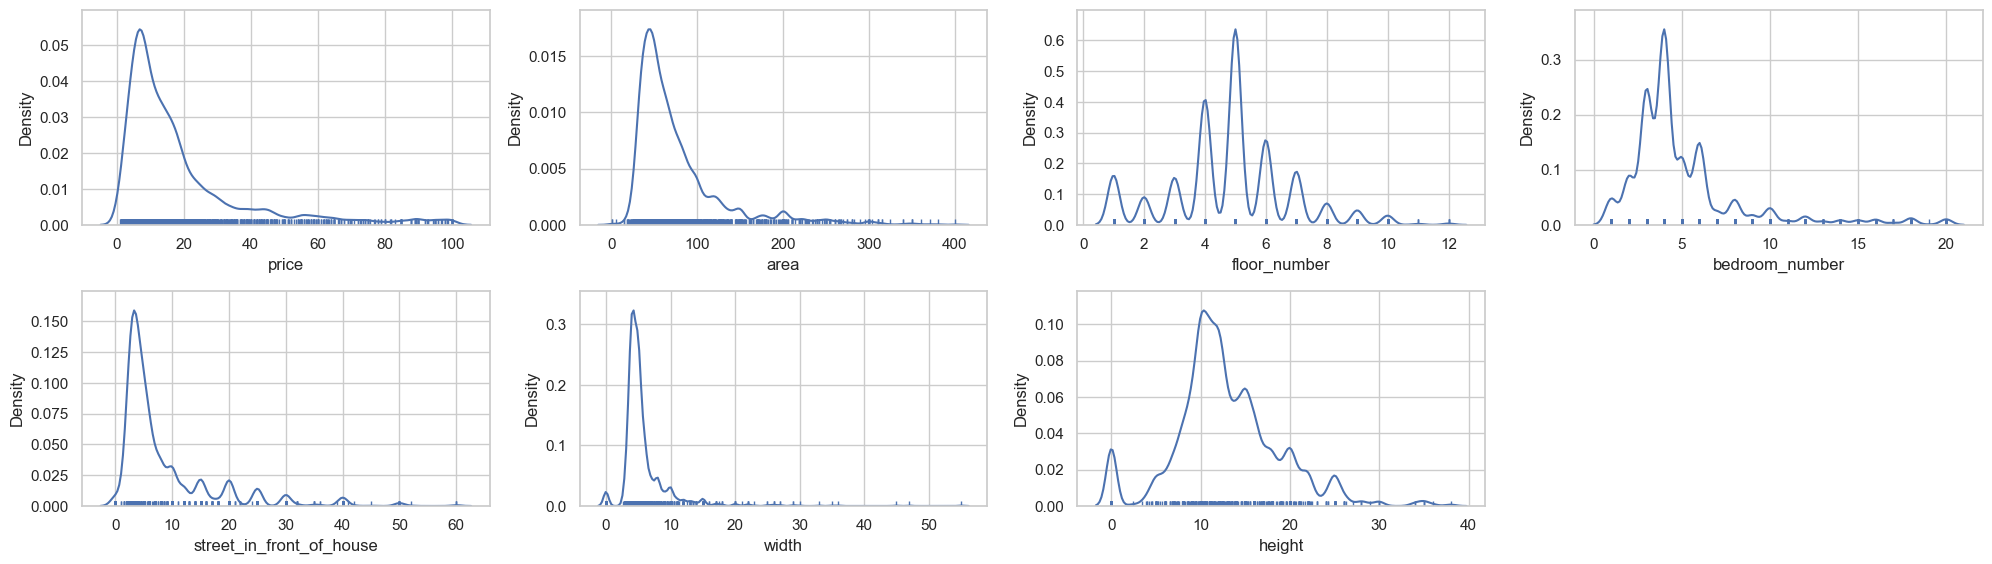

In [167]:
# vẽ lại line plot
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

## Boxplot

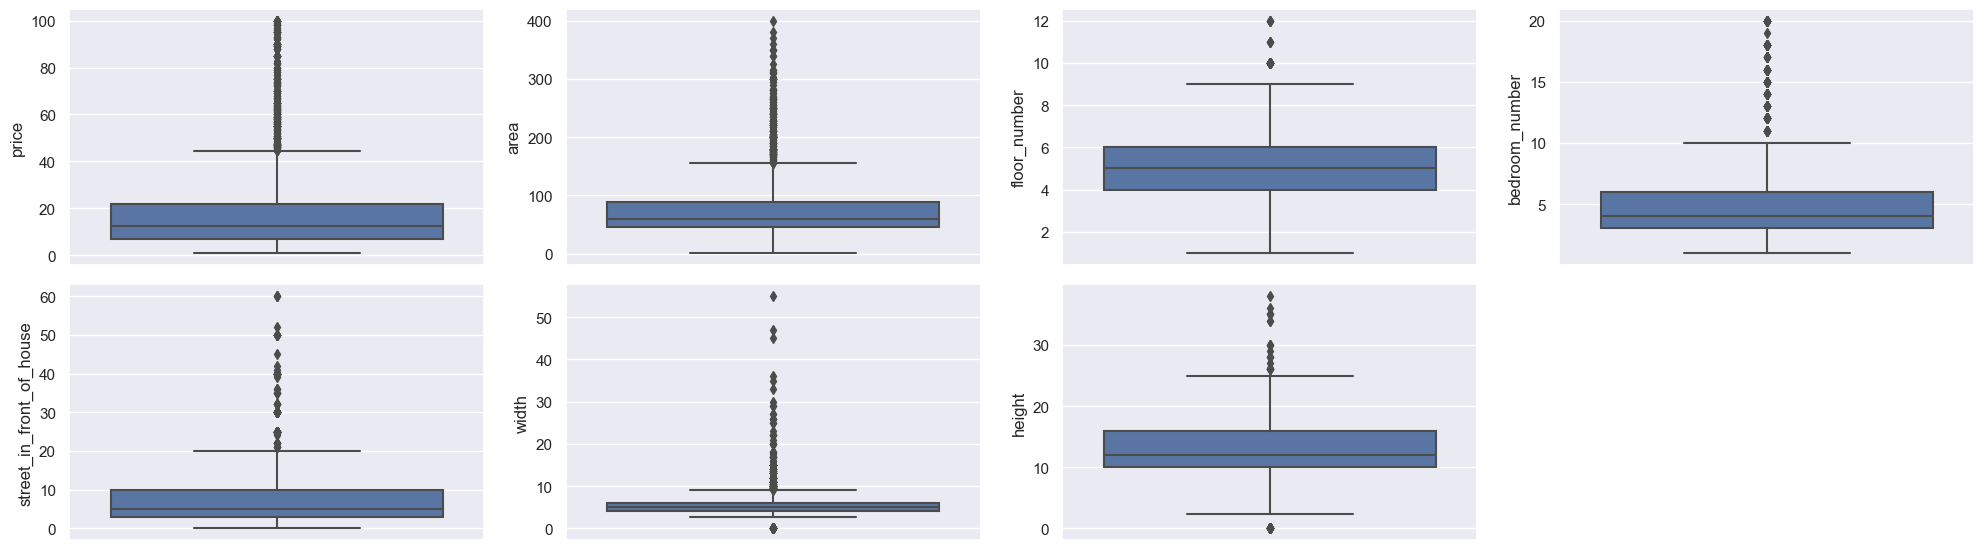

In [168]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

## Remove outlier

In [169]:
# df.drop(df[df.price <= 0].index, inplace = True)
# df.drop(df[df.price > 40].index, inplace = True)

# df.drop(df[df.area > 150].index, inplace = True)
# df.drop(df[df.area <= 0].index, inplace = True)

# # df.drop(df[df.floor_number >= 8].index, inplace = True)
# # df.drop(df[df.floor_number <= 0].index, inplace = True)

# df.drop(df[df.bedroom_number > 12].index, inplace = True)
# df.drop(df[df.bedroom_number <= 0].index, inplace = True)

# df.drop(df[df.street_in_front_of_house > 30].index, inplace = True)

# df.drop(df[df.width > 12].index, inplace = True)
# df.drop(df[df.width <= 0].index, inplace = True)

# df.drop(df[df.height > 20].index, inplace = True)
# df.drop(df[df.height <= 0].index, inplace = True)

features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()
features_categorical = df.select_dtypes(include=['object', 'bool']).copy()

# df.shape

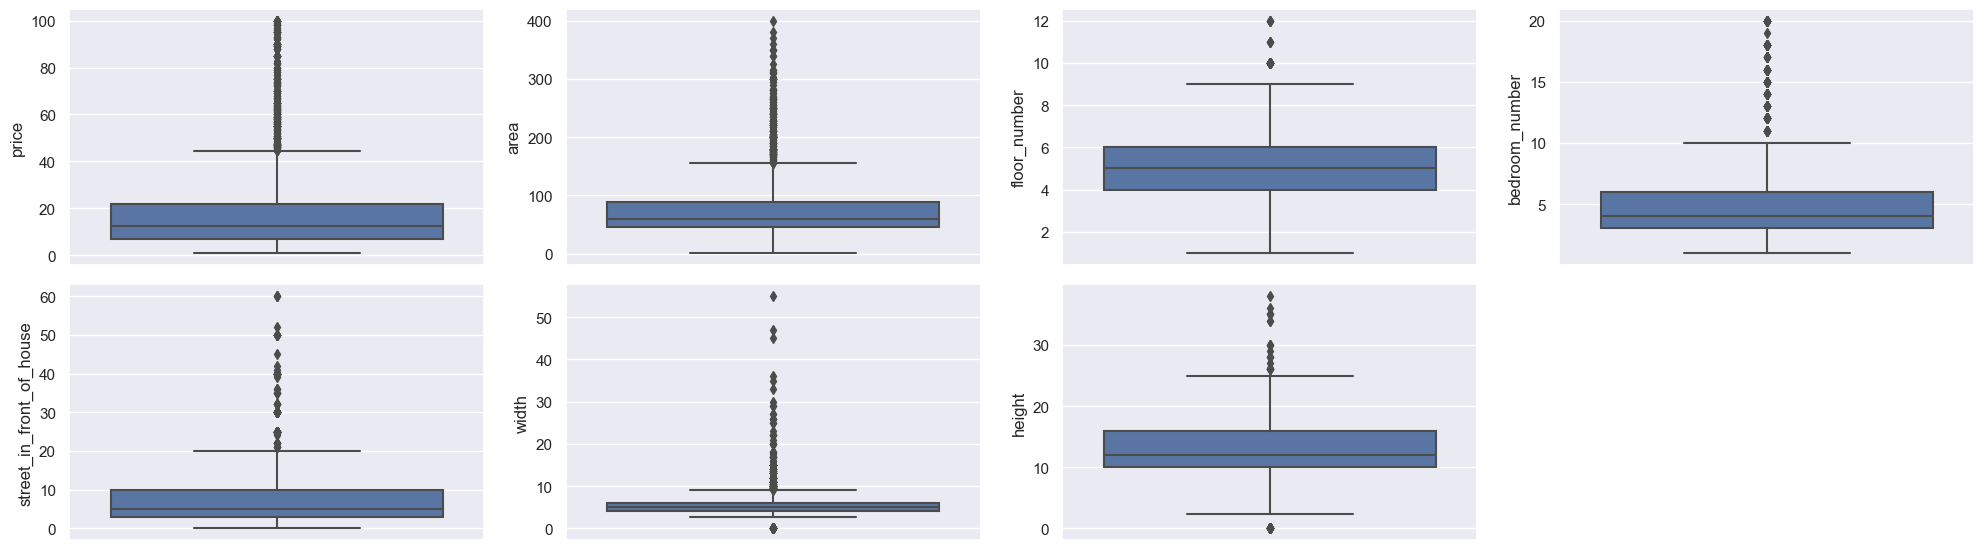

In [170]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()

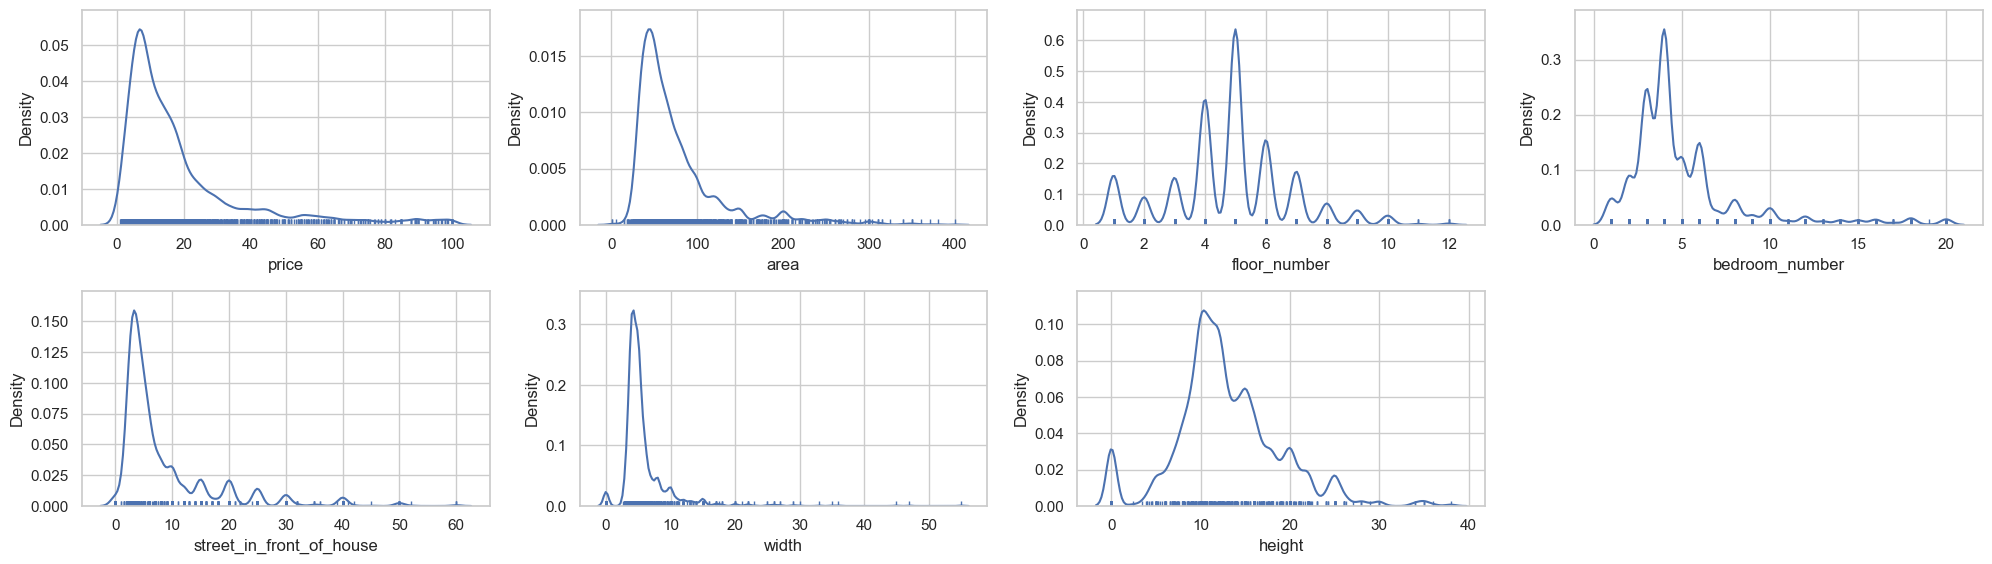

In [171]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

## Dropping unnecessary features

In [172]:
correlation = df.select_dtypes(exclude=['object', 'bool']).corr()

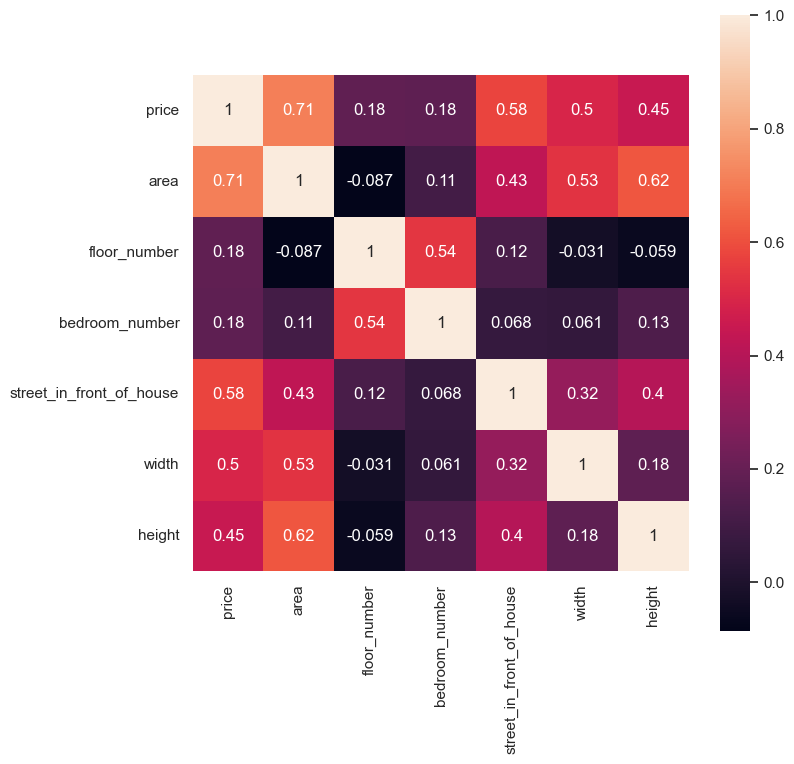

In [173]:
fig = plt.figure(figsize = (8, 8))
sns.heatmap(correlation, annot = True, square = True)
plt.show()

In [174]:
df = df.drop(['height'], axis=1)

In [175]:
df['type'].unique()

array(['Nhà trong hẻm', 'Đất thổ cư, đất ở', 'Căn hộ chung cư',
       'Nhà mặt tiền', 'Phòng trọ, nhà trọ',
       'Đất nền, liền kề, đất dự án', 'Biệt thự, nhà liền kề',
       'Văn phòng', 'Nhà hàng, khách sạn', 'Kho, xưởng',
       'Shop, kiot, quán', 'Đất nông, lâm nghiệp'], dtype=object)

In [176]:
def process_cc(row):
    if row['type'] == 'Căn hộ chung cư' and pd.isna(row['floor_number']):
        row['floor_number'] = 1
    return row
df = df.apply(process_cc, axis=1)


In [177]:
df[df['type'] == 'Căn hộ chung cư'].iloc[0:10]

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,direction,street_in_front_of_house,width,district
11,13.50,121.0,1.0,4.0,True,True,False,True,Căn hộ chung cư,Bắc,5.0,12.0,Hà Đông
57,2.90,54.0,1.0,2.0,True,True,False,False,Căn hộ chung cư,NaN,NaN,NaN,Hoàng Mai
69,3.65,74.0,1.0,3.0,True,True,False,False,Căn hộ chung cư,NaN,NaN,NaN,Hoàng Mai
91,3.35,65.0,1.0,2.0,True,True,True,True,Căn hộ chung cư,NaN,NaN,NaN,Bắc Từ Liêm
127,4.95,67.0,1.0,2.0,True,True,False,True,Căn hộ chung cư,NaN,NaN,NaN,Hoàng Mai
132,6.68,135.0,1.0,3.0,True,True,True,True,Căn hộ chung cư,NaN,40.0,8.0,Hà Đông
210,7.50,81.0,1.0,2.0,False,False,False,False,Căn hộ chung cư,NaN,8.0,NaN,Bắc Từ Liêm
228,5.00,84.0,12.0,3.0,True,True,True,True,Căn hộ chung cư,NaN,10.0,10.0,Nam Từ Liêm
241,9.30,90.0,1.0,4.0,False,False,False,False,Căn hộ chung cư,NaN,8.0,NaN,Hai Bà Trưng
256,2.75,55.0,3.0,2.0,False,False,False,False,Căn hộ chung cư,NaN,30.0,5.0,Bắc Từ Liêm


## Fill missing number in numerical features

In [178]:
df.select_dtypes(exclude=['object', 'bool']).isna().mean().sort_values(ascending = False)

width                       0.283201
bedroom_number              0.167546
floor_number                0.151715
street_in_front_of_house    0.039578
price                       0.000000
area                        0.000000
dtype: float64

In [179]:
columns = ['width', 'floor_number', 'bedroom_number', 'street_in_front_of_house', 'price', 'area']
for i in columns:
    imp = impute.SimpleImputer()
    df[i] = imp.fit_transform(np.array(df[i]).reshape(-1,1))
    if i == 'floor_number' or i == 'bedroom_number':
        df[i] = df[i].round()

## Replace missing values in categorical features

In [180]:
df.fillna('None', inplace = True)

In [181]:
features_categorical = df.select_dtypes(include=['object', 'bool'])
features_categorical.columns

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack', 'type',
       'direction', 'district'],
      dtype='object')

In [182]:
df['type'].value_counts()

type
Nhà trong hẻm                  1004
Nhà mặt tiền                    543
Đất thổ cư, đất ở               384
Biệt thự, nhà liền kề           153
Phòng trọ, nhà trọ               71
Căn hộ chung cư                  67
Văn phòng                        26
Đất nền, liền kề, đất dự án      14
Nhà hàng, khách sạn               7
Kho, xưởng                        2
Shop, kiot, quán                  2
Đất nông, lâm nghiệp              1
Name: count, dtype: int64

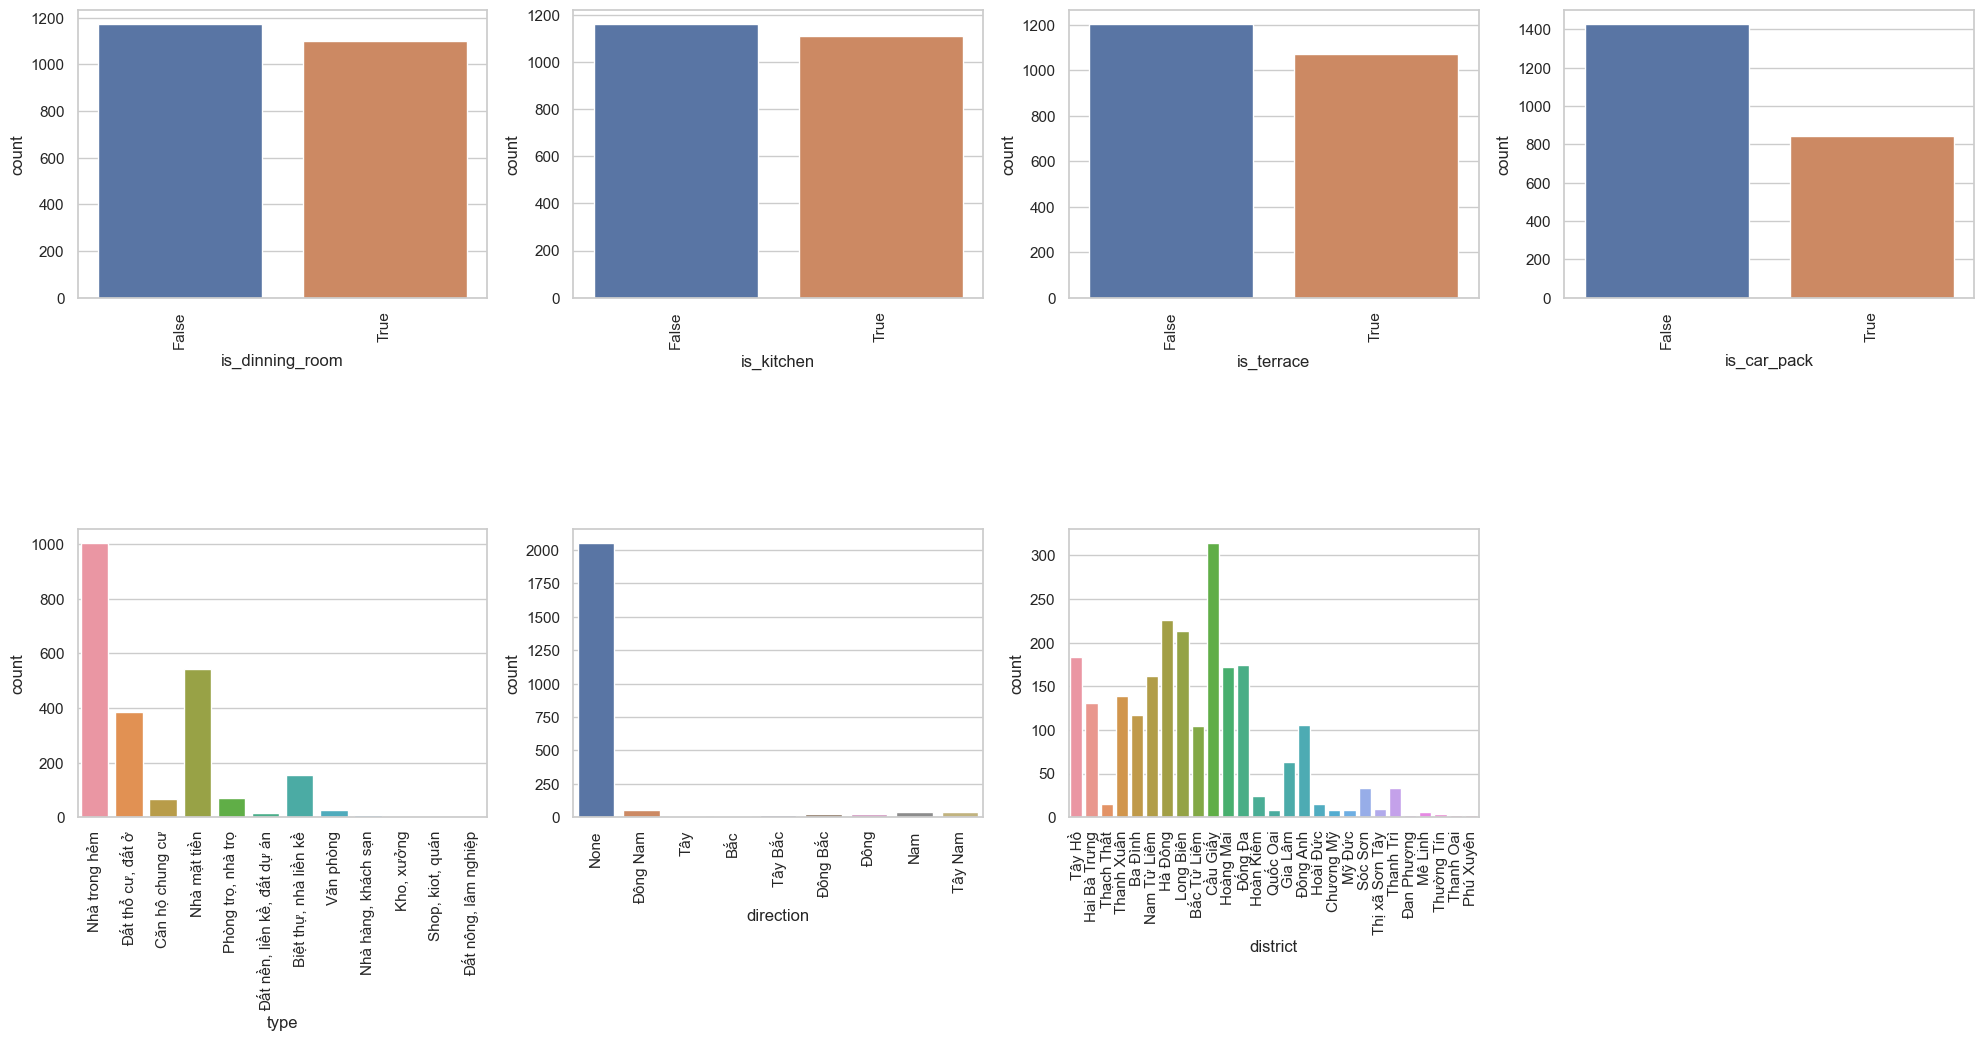

In [183]:
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(x=features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

In [184]:
df = df.drop('direction', axis = 1)
df

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,10.30,48.0,4.0,4.0,False,False,False,False,Nhà trong hẻm,3.0,5.834718,Tây Hồ
1,8.80,53.0,5.0,3.0,True,True,True,False,Nhà trong hẻm,3.0,6.000000,Hai Bà Trưng
2,2.10,66.0,5.0,5.0,False,False,False,False,"Đất thổ cư, đất ở",5.0,5.000000,Thạch Thất
5,9.60,45.0,5.0,3.0,False,False,False,False,Nhà trong hẻm,3.0,4.500000,Thanh Xuân
6,3.50,173.0,5.0,5.0,False,False,False,False,"Đất thổ cư, đất ở",7.0,5.000000,Thạch Thất
...,...,...,...,...,...,...,...,...,...,...,...,...
2942,28.80,65.0,5.0,4.0,True,True,True,True,Nhà trong hẻm,7.0,5.000000,Hoàng Mai
2943,3.50,60.0,5.0,5.0,False,False,False,False,"Đất thổ cư, đất ở",8.0,3.500000,Hà Đông
2944,5.65,40.0,5.0,5.0,False,False,False,False,"Đất thổ cư, đất ở",4.0,3.850000,Hà Đông
2945,3.15,35.0,5.0,5.0,False,False,False,False,"Đất thổ cư, đất ở",4.0,3.600000,Hà Đông


In [185]:
def process_type(row):
    if row['type'] not in ['Căn hộ chung cư', 'Nhà trong hẻm']:
        row['type'] = 'Nhà mặt phố'
    return row
df = df.apply(process_type, axis=1)
df['type'].value_counts()

type
Nhà mặt phố        1203
Nhà trong hẻm      1004
Căn hộ chung cư      67
Name: count, dtype: int64

In [186]:
df.shape

(2274, 12)

In [187]:
features_categorical = df.select_dtypes(include=['object', 'bool'])
features_categorical.columns

Index(['is_dinning_room', 'is_kitchen', 'is_terrace', 'is_car_pack', 'type',
       'district'],
      dtype='object')

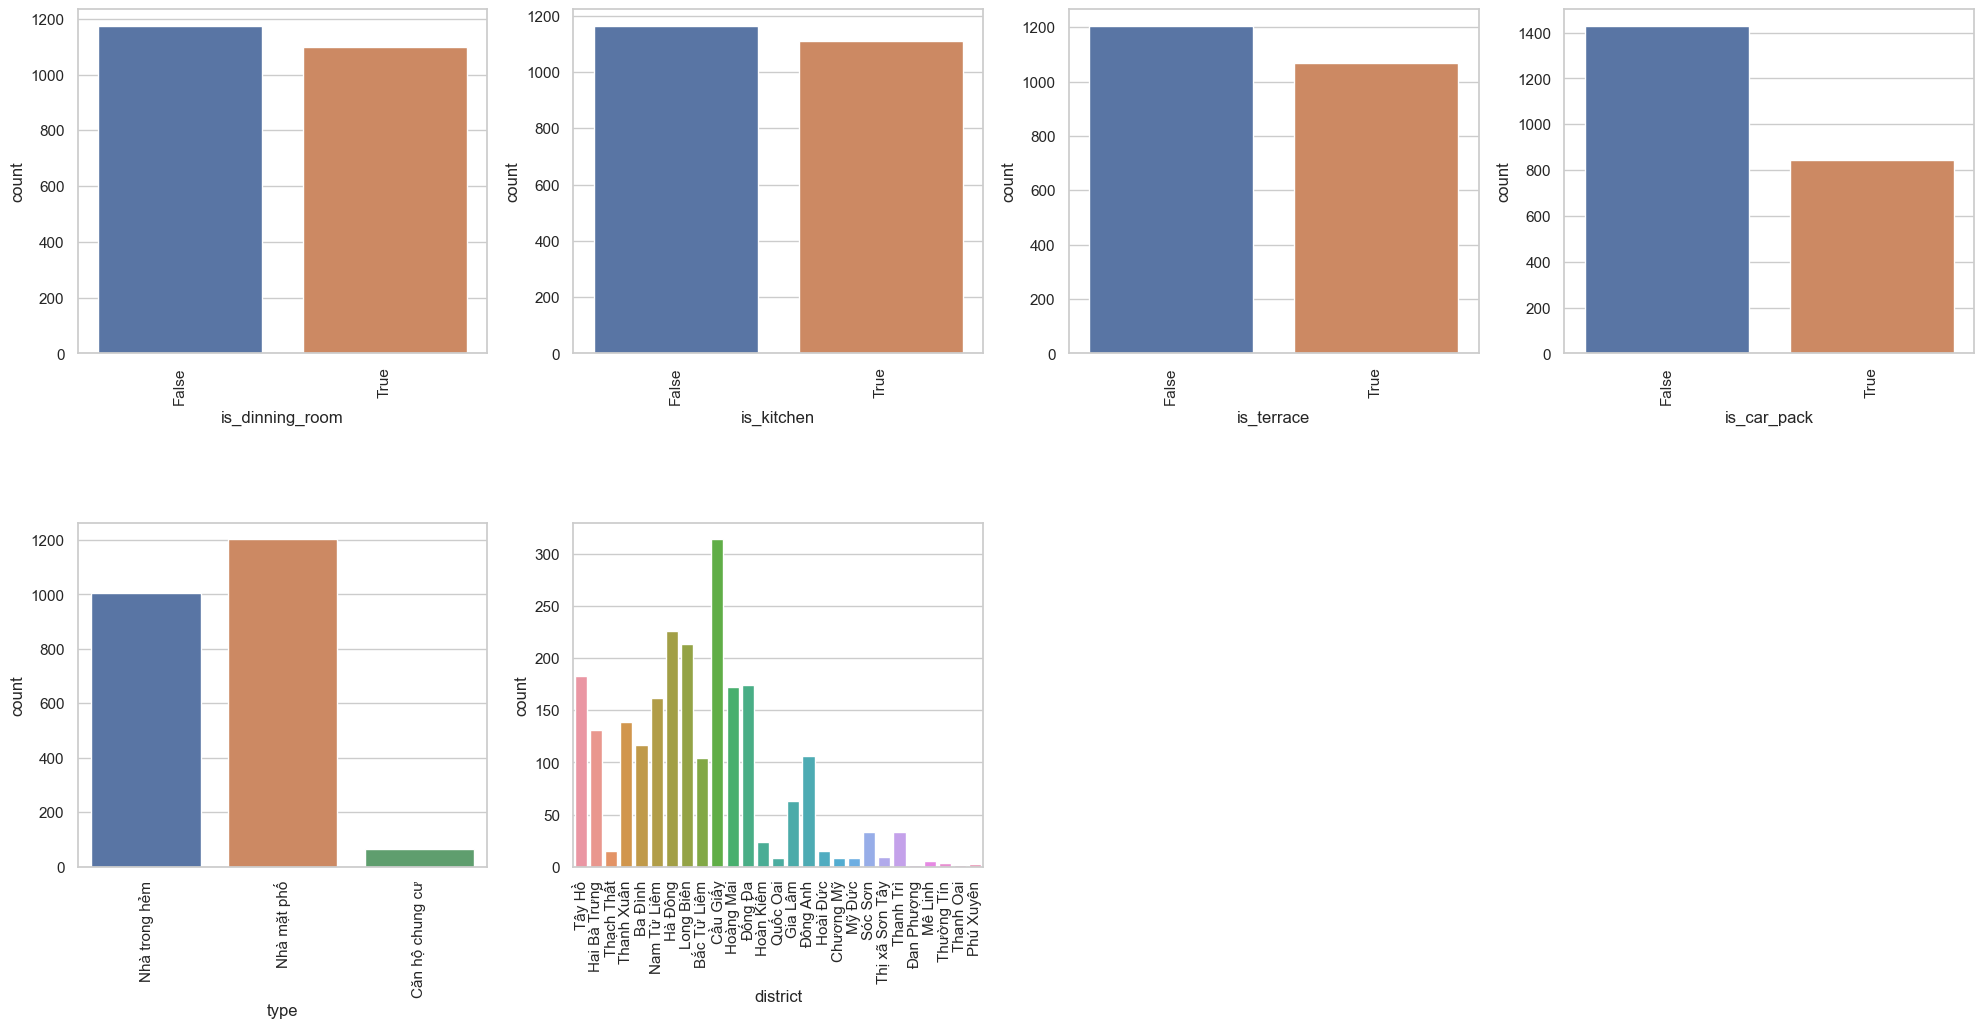

In [188]:
fig = plt.figure(figsize = (20,50))
for i in range(len(features_categorical.columns)):
    fig.add_subplot(10, 4, i+1)
    ax = sns.countplot(x=features_categorical.iloc[:,i].dropna())
    plt.xticks(rotation = 90)
plt.tight_layout()

In [189]:
df.district.value_counts()

district
Cầu Giấy          314
Hà Đông           226
Long Biên         213
Tây Hồ            183
Đống Đa           174
Hoàng Mai         172
Nam Từ Liêm       162
Thanh Xuân        139
Hai Bà Trưng      131
Ba Đình           117
Đông Anh          106
Bắc Từ Liêm       104
Gia Lâm            63
Sóc Sơn            33
Thanh Trì          33
Hoàn Kiếm          24
Thạch Thất         15
Hoài Đức           15
Thị xã Sơn Tây      9
Quốc Oai            8
Mỹ Đức              8
Chương Mỹ           8
Mê Linh             6
Thường Tín          4
Phú Xuyên           3
Đan Phượng          2
Thanh Oai           2
Name: count, dtype: int64

In [190]:
def process_district(row):
    if row['district'] not in ['Long Biên', 'Hoàng Mai', 'Nam Từ Liêm', 'Bắc Từ Liêm', 'Đống Đa', 'Hai Bà Trưng', 'Thanh Xuân', 'Cầu Giấy', 'Tây Hồ','Đông Anh','Gia Lâm','Hà Đông','Hoàn Kiếm','Ba Đình']:
        row['district'] = 'Ngoại thành'
    return row
df = df.apply(process_district, axis=1)
df.district.value_counts()


district
Cầu Giấy        314
Hà Đông         226
Long Biên       213
Tây Hồ          183
Đống Đa         174
Hoàng Mai       172
Nam Từ Liêm     162
Ngoại thành     146
Thanh Xuân      139
Hai Bà Trưng    131
Ba Đình         117
Đông Anh        106
Bắc Từ Liêm     104
Gia Lâm          63
Hoàn Kiếm        24
Name: count, dtype: int64

In [191]:
df.columns

Index(['price', 'area', 'floor_number', 'bedroom_number', 'is_dinning_room',
       'is_kitchen', 'is_terrace', 'is_car_pack', 'type',
       'street_in_front_of_house', 'width', 'district'],
      dtype='object')

In [192]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
df['is_dinning_room'] = label_encoder.fit_transform(df['is_dinning_room'])
df['is_kitchen'] = label_encoder.fit_transform(df['is_kitchen'])
df['is_terrace'] = label_encoder.fit_transform(df['is_terrace'])
df['is_car_pack'] = label_encoder.fit_transform(df['is_car_pack'])
#  df['type'] = label_encoder.fit_transform(df['type'])
#  df['district'] = label_encoder.fit_transform(df['district'])



In [193]:
df.iloc[0:10]

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,10.30,48.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,3.0,5.834718,Tây Hồ
1,8.80,53.0,5.0,3.0,1,1,1,0,Nhà trong hẻm,3.0,6.000000,Hai Bà Trưng
2,2.10,66.0,5.0,5.0,0,0,0,0,Nhà mặt phố,5.0,5.000000,Ngoại thành
5,9.60,45.0,5.0,3.0,0,0,0,0,Nhà trong hẻm,3.0,4.500000,Thanh Xuân
6,3.50,173.0,5.0,5.0,0,0,0,0,Nhà mặt phố,7.0,5.000000,Ngoại thành
7,10.80,40.0,7.0,10.0,1,1,1,1,Nhà trong hẻm,3.0,5.000000,Ba Đình
9,2.25,79.0,5.0,5.0,0,0,0,0,Nhà mặt phố,5.0,5.000000,Ngoại thành
10,15.98,52.0,7.0,15.0,1,1,1,1,Nhà mặt phố,4.0,5.834718,Nam Từ Liêm
11,13.50,121.0,1.0,4.0,1,1,0,1,Căn hộ chung cư,5.0,12.000000,Hà Đông
12,30.00,55.0,9.0,8.0,1,1,1,1,Nhà mặt phố,10.0,5.000000,Hà Đông


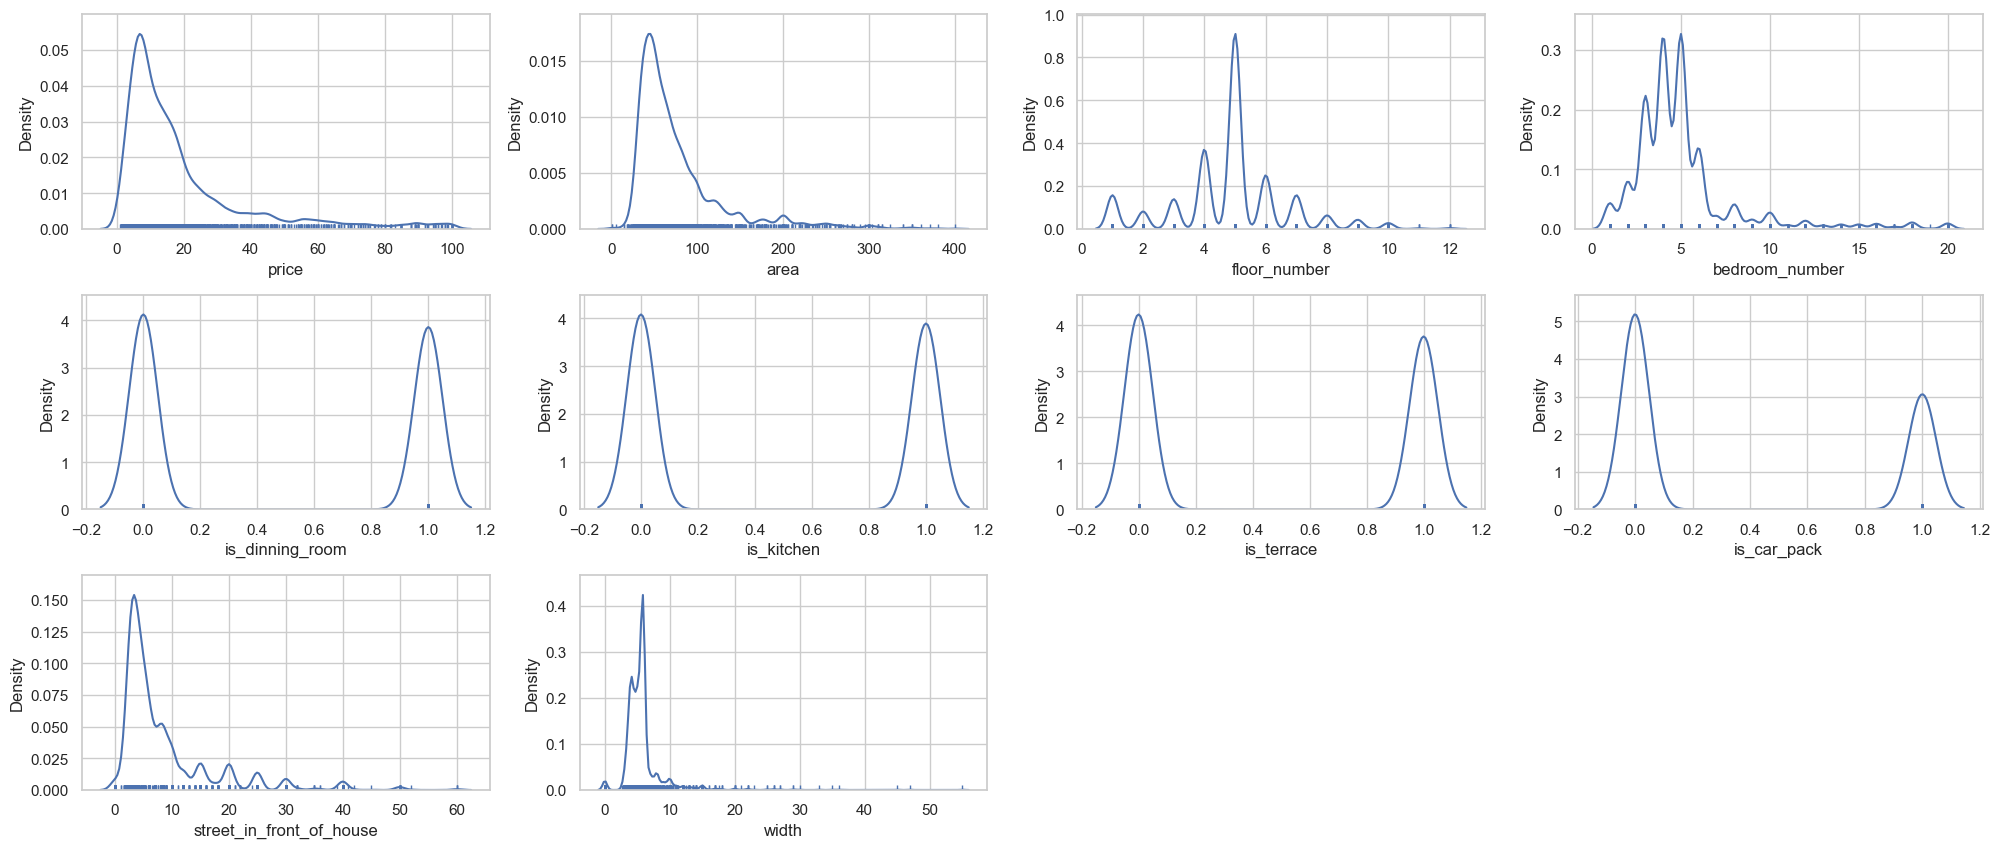

In [194]:
features_numerical = df.select_dtypes(exclude=['object', 'bool']).copy()

fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(features_numerical.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

In [195]:
df.shape

(2274, 12)

In [196]:
df.to_csv('data/clean_data.csv', index=False)

In [197]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, random_state=169)
df_train, df_val = train_test_split(df_train, train_size=0.75, random_state=169)

In [198]:
df_train.shape, df_val.shape, df_test.shape

((1364, 12), (455, 12), (455, 12))

In [199]:
df_train.to_csv('data/train.csv', index=False)
df_val.to_csv('data/val.csv', index=False)
df_test.to_csv('data/test.csv', index=False)

In [200]:
df_train

,price,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
1808,8.50,82.0,3.0,4.0,0,0,0,0,Nhà trong hẻm,3.000000,4.600000,Long Biên
1455,7.50,50.0,2.0,2.0,0,0,0,0,Nhà trong hẻm,4.000000,5.834718,Ngoại thành
2812,18.50,60.0,4.0,8.0,1,1,1,0,Nhà trong hẻm,8.498443,5.834718,Bắc Từ Liêm
2209,18.00,74.0,5.0,5.0,0,0,0,0,Nhà trong hẻm,0.000000,0.000000,Ngoại thành
371,2.00,48.0,1.0,2.0,1,1,1,1,Căn hộ chung cư,40.000000,6.000000,Hoàng Mai
...,...,...,...,...,...,...,...,...,...,...,...,...
238,3.90,40.0,5.0,5.0,0,0,0,0,Nhà mặt phố,3.000000,6.000000,Gia Lâm
1984,4.50,65.0,5.0,5.0,0,0,0,0,Nhà mặt phố,3.000000,4.100000,Đông Anh
1314,4.58,88.0,10.0,2.0,0,0,0,0,Căn hộ chung cư,50.000000,10.000000,Nam Từ Liêm
884,6.10,57.0,5.0,5.0,0,0,0,0,Nhà mặt phố,3.000000,4.700000,Long Biên


# Tạo file để tạo contest kaggle

In [201]:
price = df_test['price'].tolist()
df_test = df_test.drop(['price'], axis=1)


In [202]:
df_test.to_csv('data/test.csv', index=False)

In [208]:
df_test = pd.read_csv('data/test.csv')

In [209]:
df_test

,area,floor_number,bedroom_number,is_dinning_room,is_kitchen,is_terrace,is_car_pack,type,street_in_front_of_house,width,district
0,75.0,4.0,5.0,0,0,0,0,Nhà trong hẻm,2.500000,5.834718,Cầu Giấy
1,70.0,4.0,4.0,0,0,0,0,Nhà trong hẻm,7.000000,5.000000,Gia Lâm
2,30.0,5.0,3.0,1,1,1,0,Nhà trong hẻm,2.500000,3.400000,Hà Đông
3,32.0,5.0,5.0,0,0,0,0,Nhà mặt phố,2.000000,5.834718,Long Biên
4,72.0,2.0,2.0,1,1,1,0,Căn hộ chung cư,8.498443,5.000000,Hai Bà Trưng
...,...,...,...,...,...,...,...,...,...,...,...
450,60.0,6.0,6.0,1,1,1,1,Nhà trong hẻm,6.000000,4.000000,Hai Bà Trưng
451,36.0,6.0,4.0,0,0,0,0,Nhà trong hẻm,2.500000,5.834718,Cầu Giấy
452,130.0,3.0,3.0,0,0,0,0,Nhà trong hẻm,20.000000,10.300000,Gia Lâm
453,55.0,5.0,4.0,1,1,1,1,Nhà trong hẻm,6.000000,4.000000,Bắc Từ Liêm


In [213]:
solution = pd.DataFrame({
    "Id": df_test.index,
    "Usage": "Public",
    "TARGET": price
})

In [214]:
solution.to_csv('data/solution.csv', index=False)

In [212]:
rand_submission = pd.DataFrame({
    "Id": df_test.index,
    "TARGET": np.random.randint(0, 100, size=len(df_test))
})
rand_submission.to_csv('data/rand_submission.csv', index=False)